In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
from itertools import combinations
import itertools
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

!apt-get update
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

# Set LaTeX and figure configuration
plt.rcParams.update({
    'text.usetex': True,
    'font.size': 40,
    'figure.figsize': (10, 8),
    'figure.dpi': 600,
    'font.family': 'serif'
})


# Load CSV file into a pandas DataFrame
df = pd.read_csv(r'/content/drive/MyDrive/Research/ICML_2023_Raw/survey.csv')

# Count non-empty values in 'estimated_probability' column
count_non_empty = df['estimated_probability'].notna().sum()

print(f"Number of non-empty rows in 'estimated_probability': {count_non_empty}")


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,864 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,155 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64

In [3]:
df['estimated_probability'].notna()[:10]

,estimated_probability
0,True
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,True
9,False


[1.0, 0.88, 0.79, 0.66, 0.5, 0.39, 0.14, 0.11, 0.07, 0.03, 0.01]


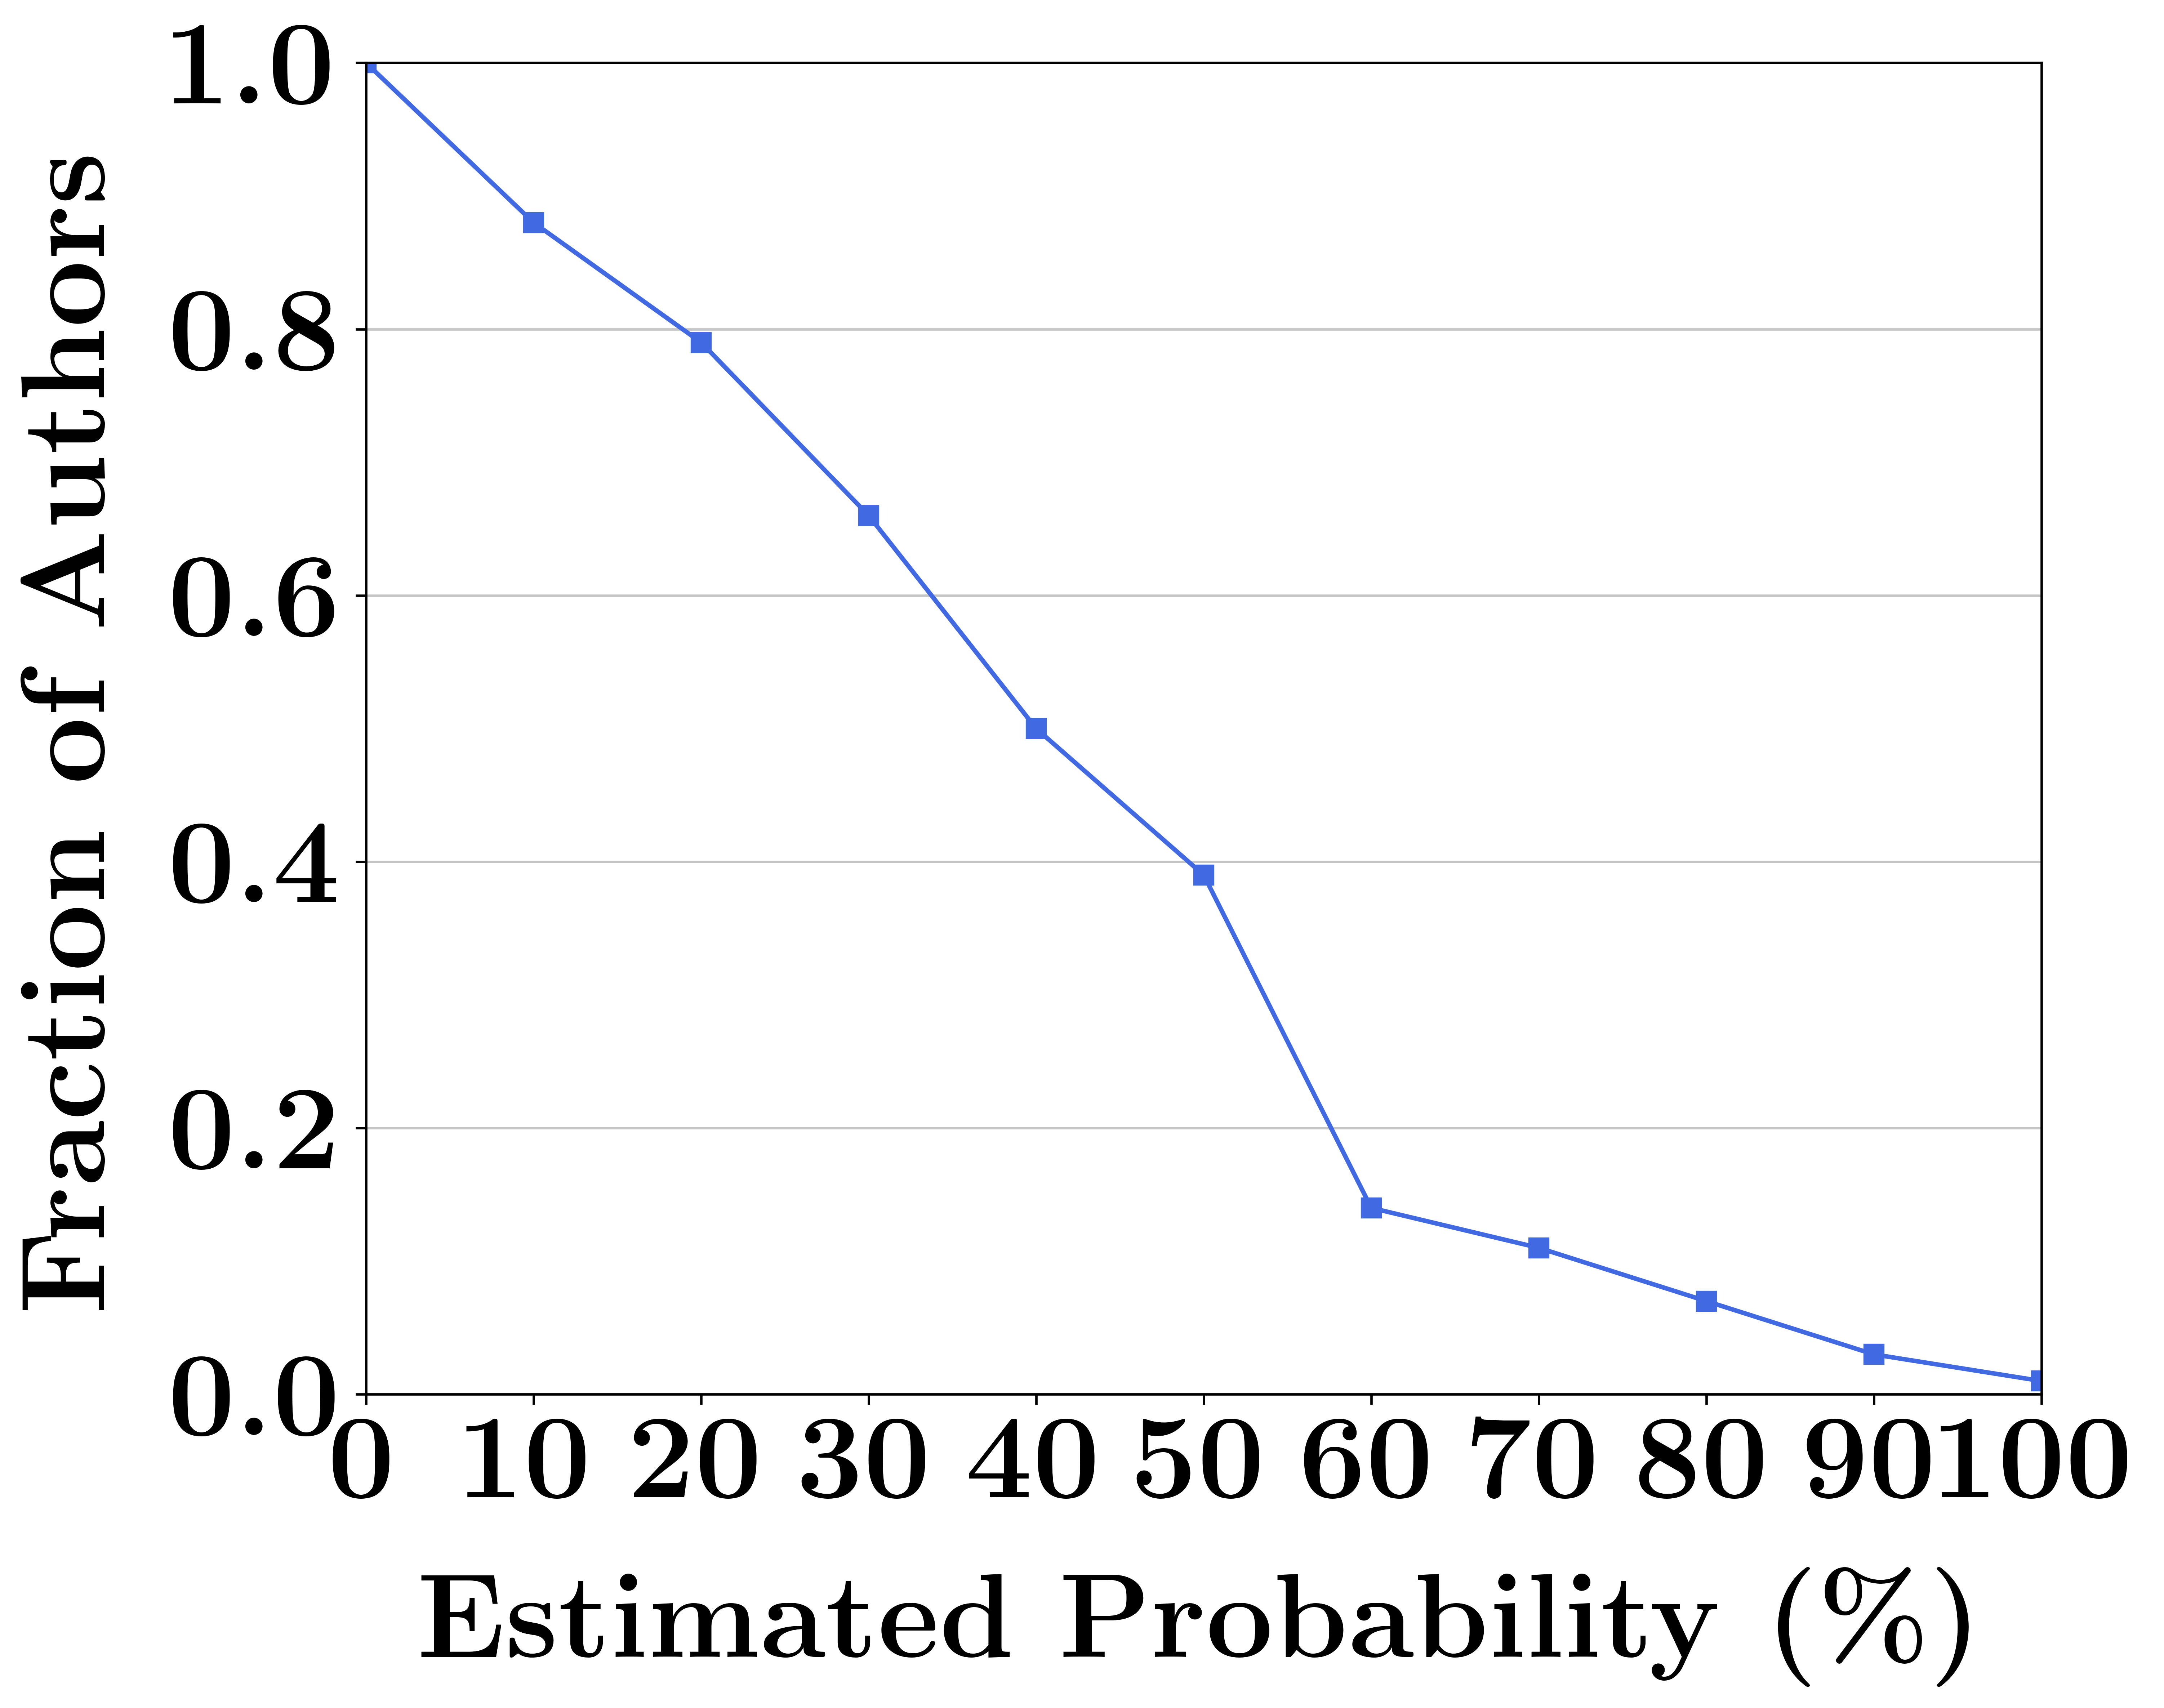

In [4]:
count = []

for i in range(11):
    count.append(round(len(df[df['estimated_probability'] >= (i) * 10]) / 1384, 2))

print(count)

# values = ["$\leq 10$", "$\leq 20$", ...]
values = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

fig = plt.figure()

# Plot with legend label in bold
plt.plot(values, count, 's-', color='royalblue')

# Bold axis labels
plt.xlabel(r'\textbf{Estimated Probability (\%)}', labelpad=15)
plt.ylabel(r'\textbf{Fraction of Authors}', labelpad=15)

# Bold x-tick and y-tick labels
plt.xticks(ticks=values, labels=[fr'\textbf{{{v}}}' for v in values])
ytick_vals = np.linspace(0, 1, 6)  # 0.0, 0.2, ..., 1.0
plt.yticks(ticks=ytick_vals, labels=[fr'\textbf{{{round(v, 1)}}}' for v in ytick_vals])

plt.xlim(0, 100)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.75)

plt.savefig("/content/drive/MyDrive/Research/ICML_2023_Result/Figures/estimated_probability.png", bbox_inches='tight')
plt.show()


In [5]:
# Set LaTeX and figure configuration
plt.rcParams.update({
    'text.usetex': True,
    'font.size': 35,
    'figure.figsize': (8, 8),
    'figure.dpi': 300,
    'font.family': 'serif'
})


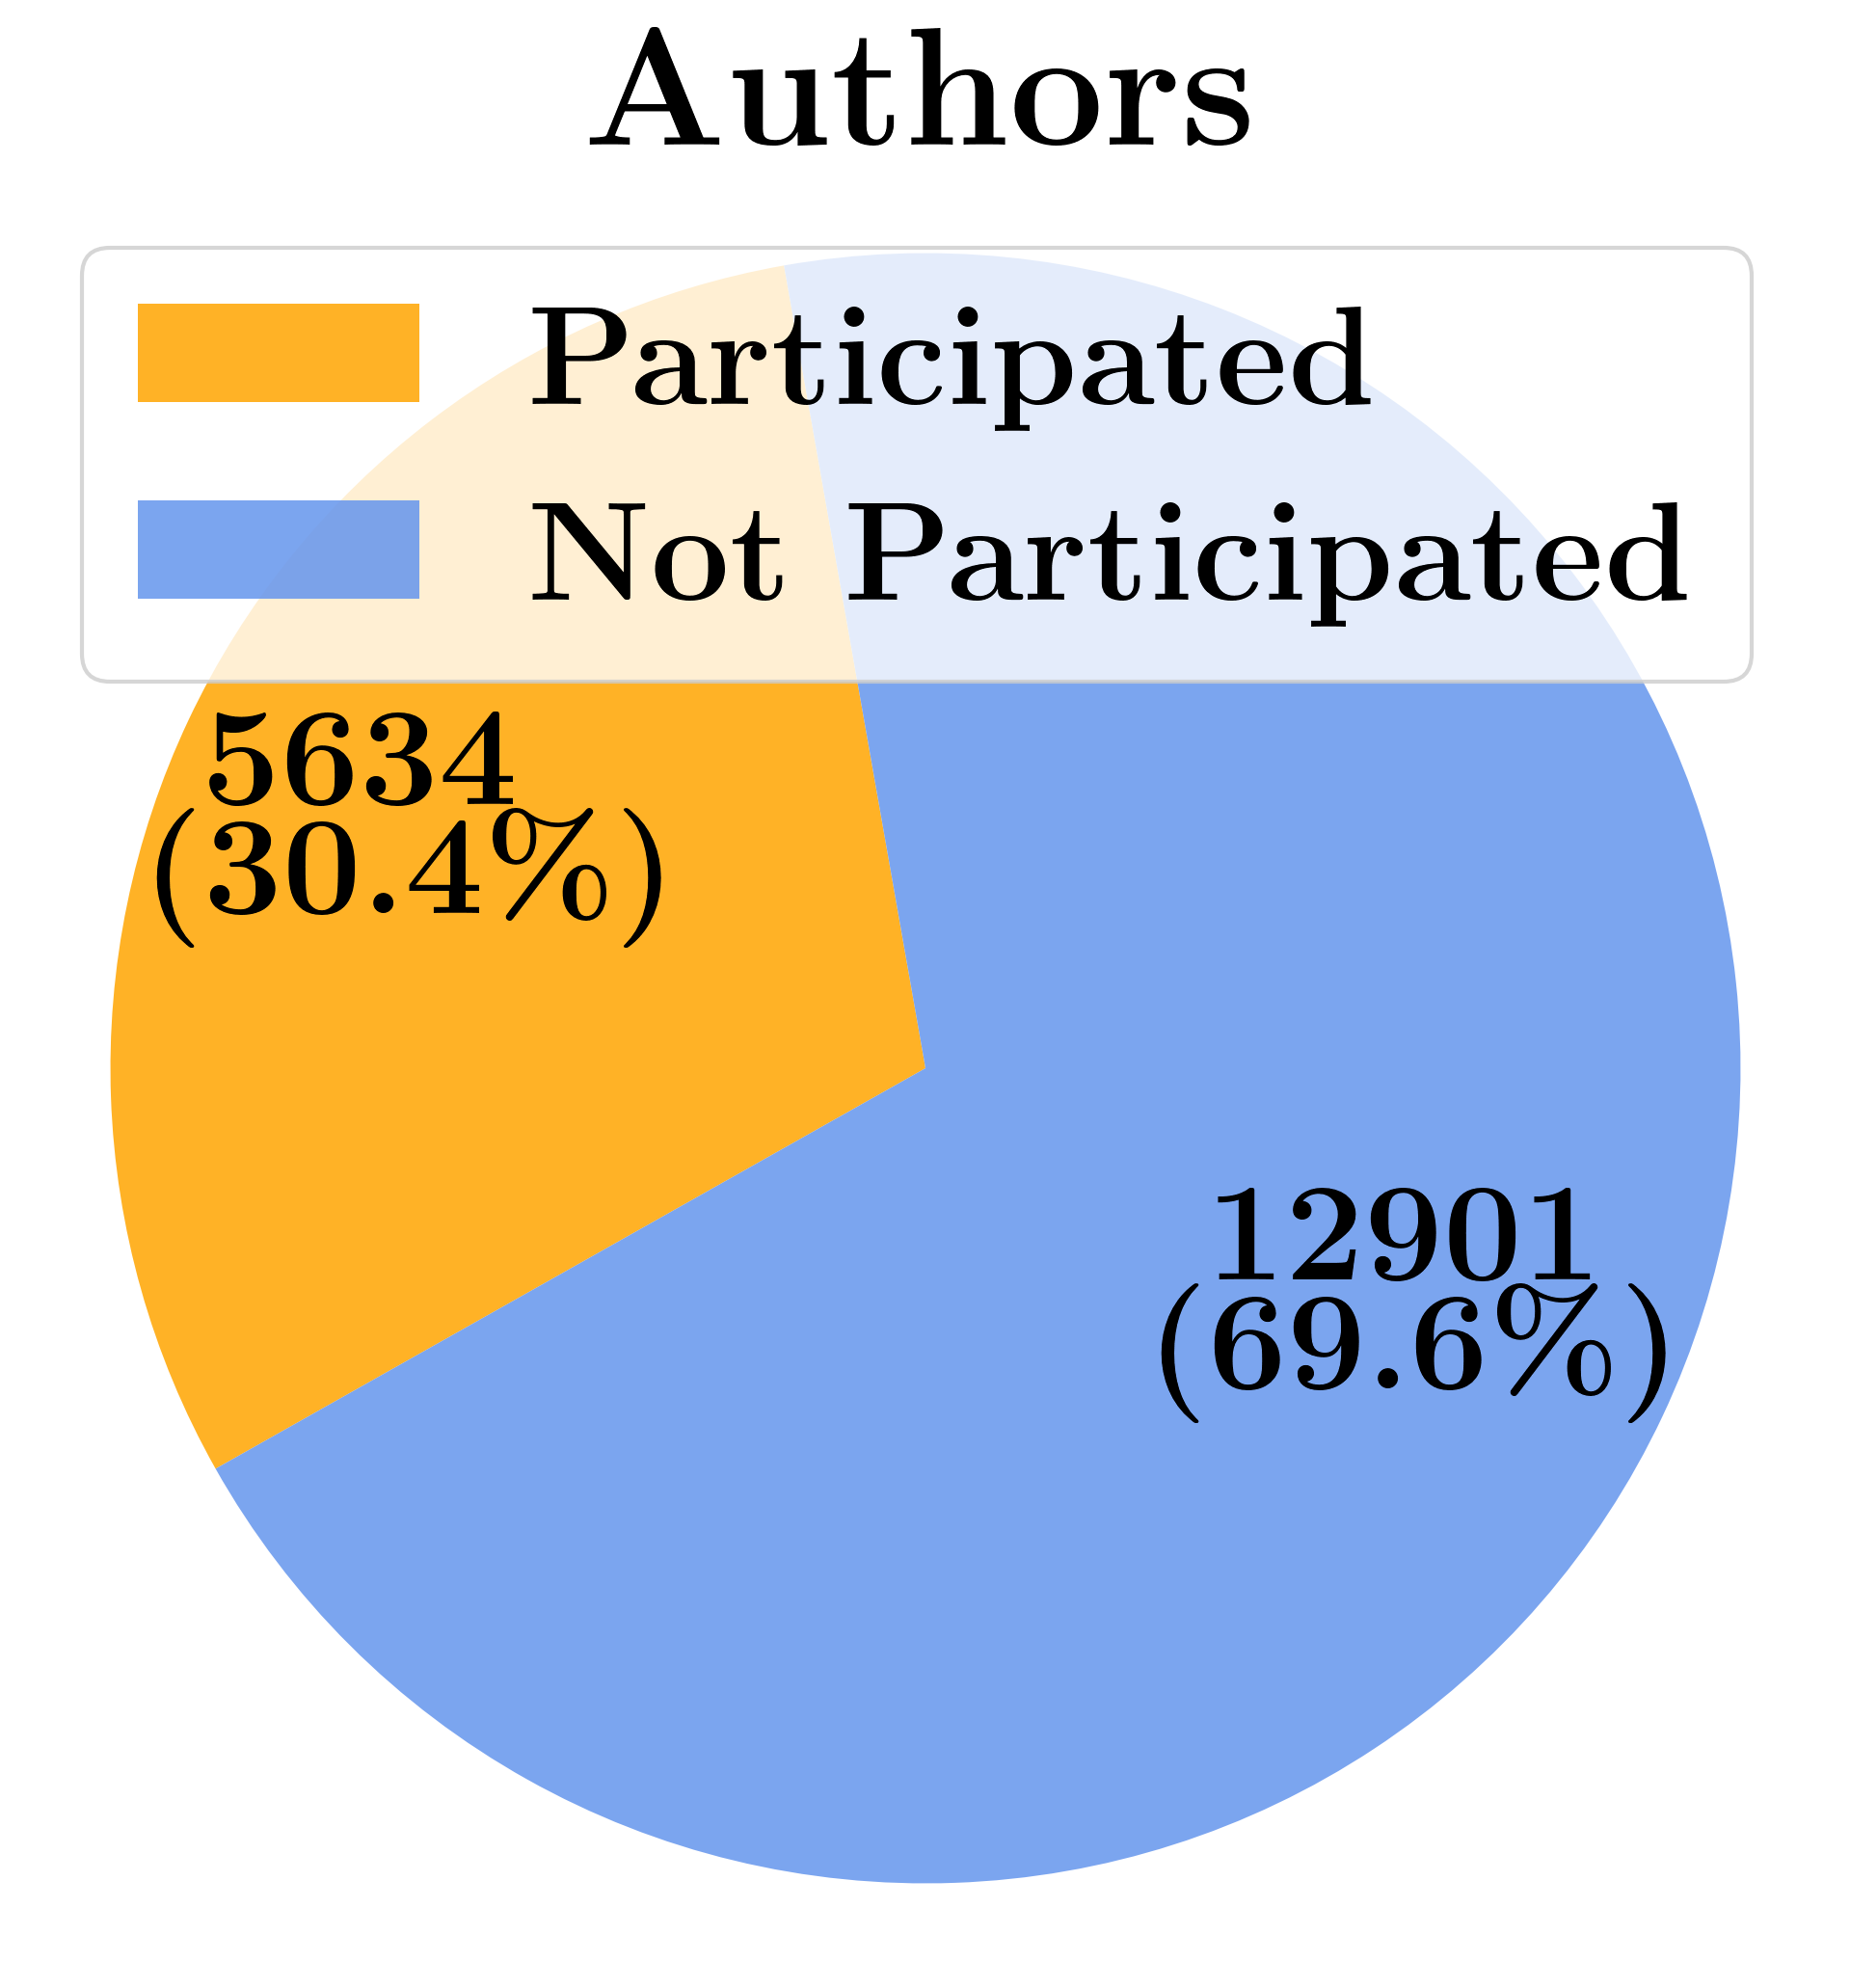

In [6]:

# Data for the pie chart
categories = [r'\textbf{Participated}', r'\textbf{Not Participated}']
values = [5634, 12901]
percentages = [r'\textbf{5634}\\\textbf{(30.4\%)}', r'\textbf{12901}\\\textbf{(69.6\%)}']
total = sum(values)

# Transparency
tran = 0.85

# Colors
color_options = [
    (255/255, 165/255, 0/255, tran),     # Orange
    (100/255, 149/255, 237/255, tran),   # Cornflower Blue
]
colors = [color_options[0], color_options[1]]

# Create pie chart
plt.figure()
wedges, texts = plt.pie(values, startangle=100, colors=colors, radius=1.1)

# Add custom labels with LaTeX bold formatting
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.75 * np.cos(np.deg2rad(angle))
    y = 0.75 * np.sin(np.deg2rad(angle))
    plt.text(x, y, percentages[i], ha='center', va='center')

# Bold LaTeX title and legend
plt.title(r'\textbf{Authors}')
plt.legend(wedges, categories, loc="upper right", fontsize = 35)
plt.axis('equal')

# Save
plt.savefig("/content/drive/MyDrive/Research/ICML_2023_Result/Figures/" + "pie_chart_participate_author.png", bbox_inches='tight', dpi=600)
plt.show()

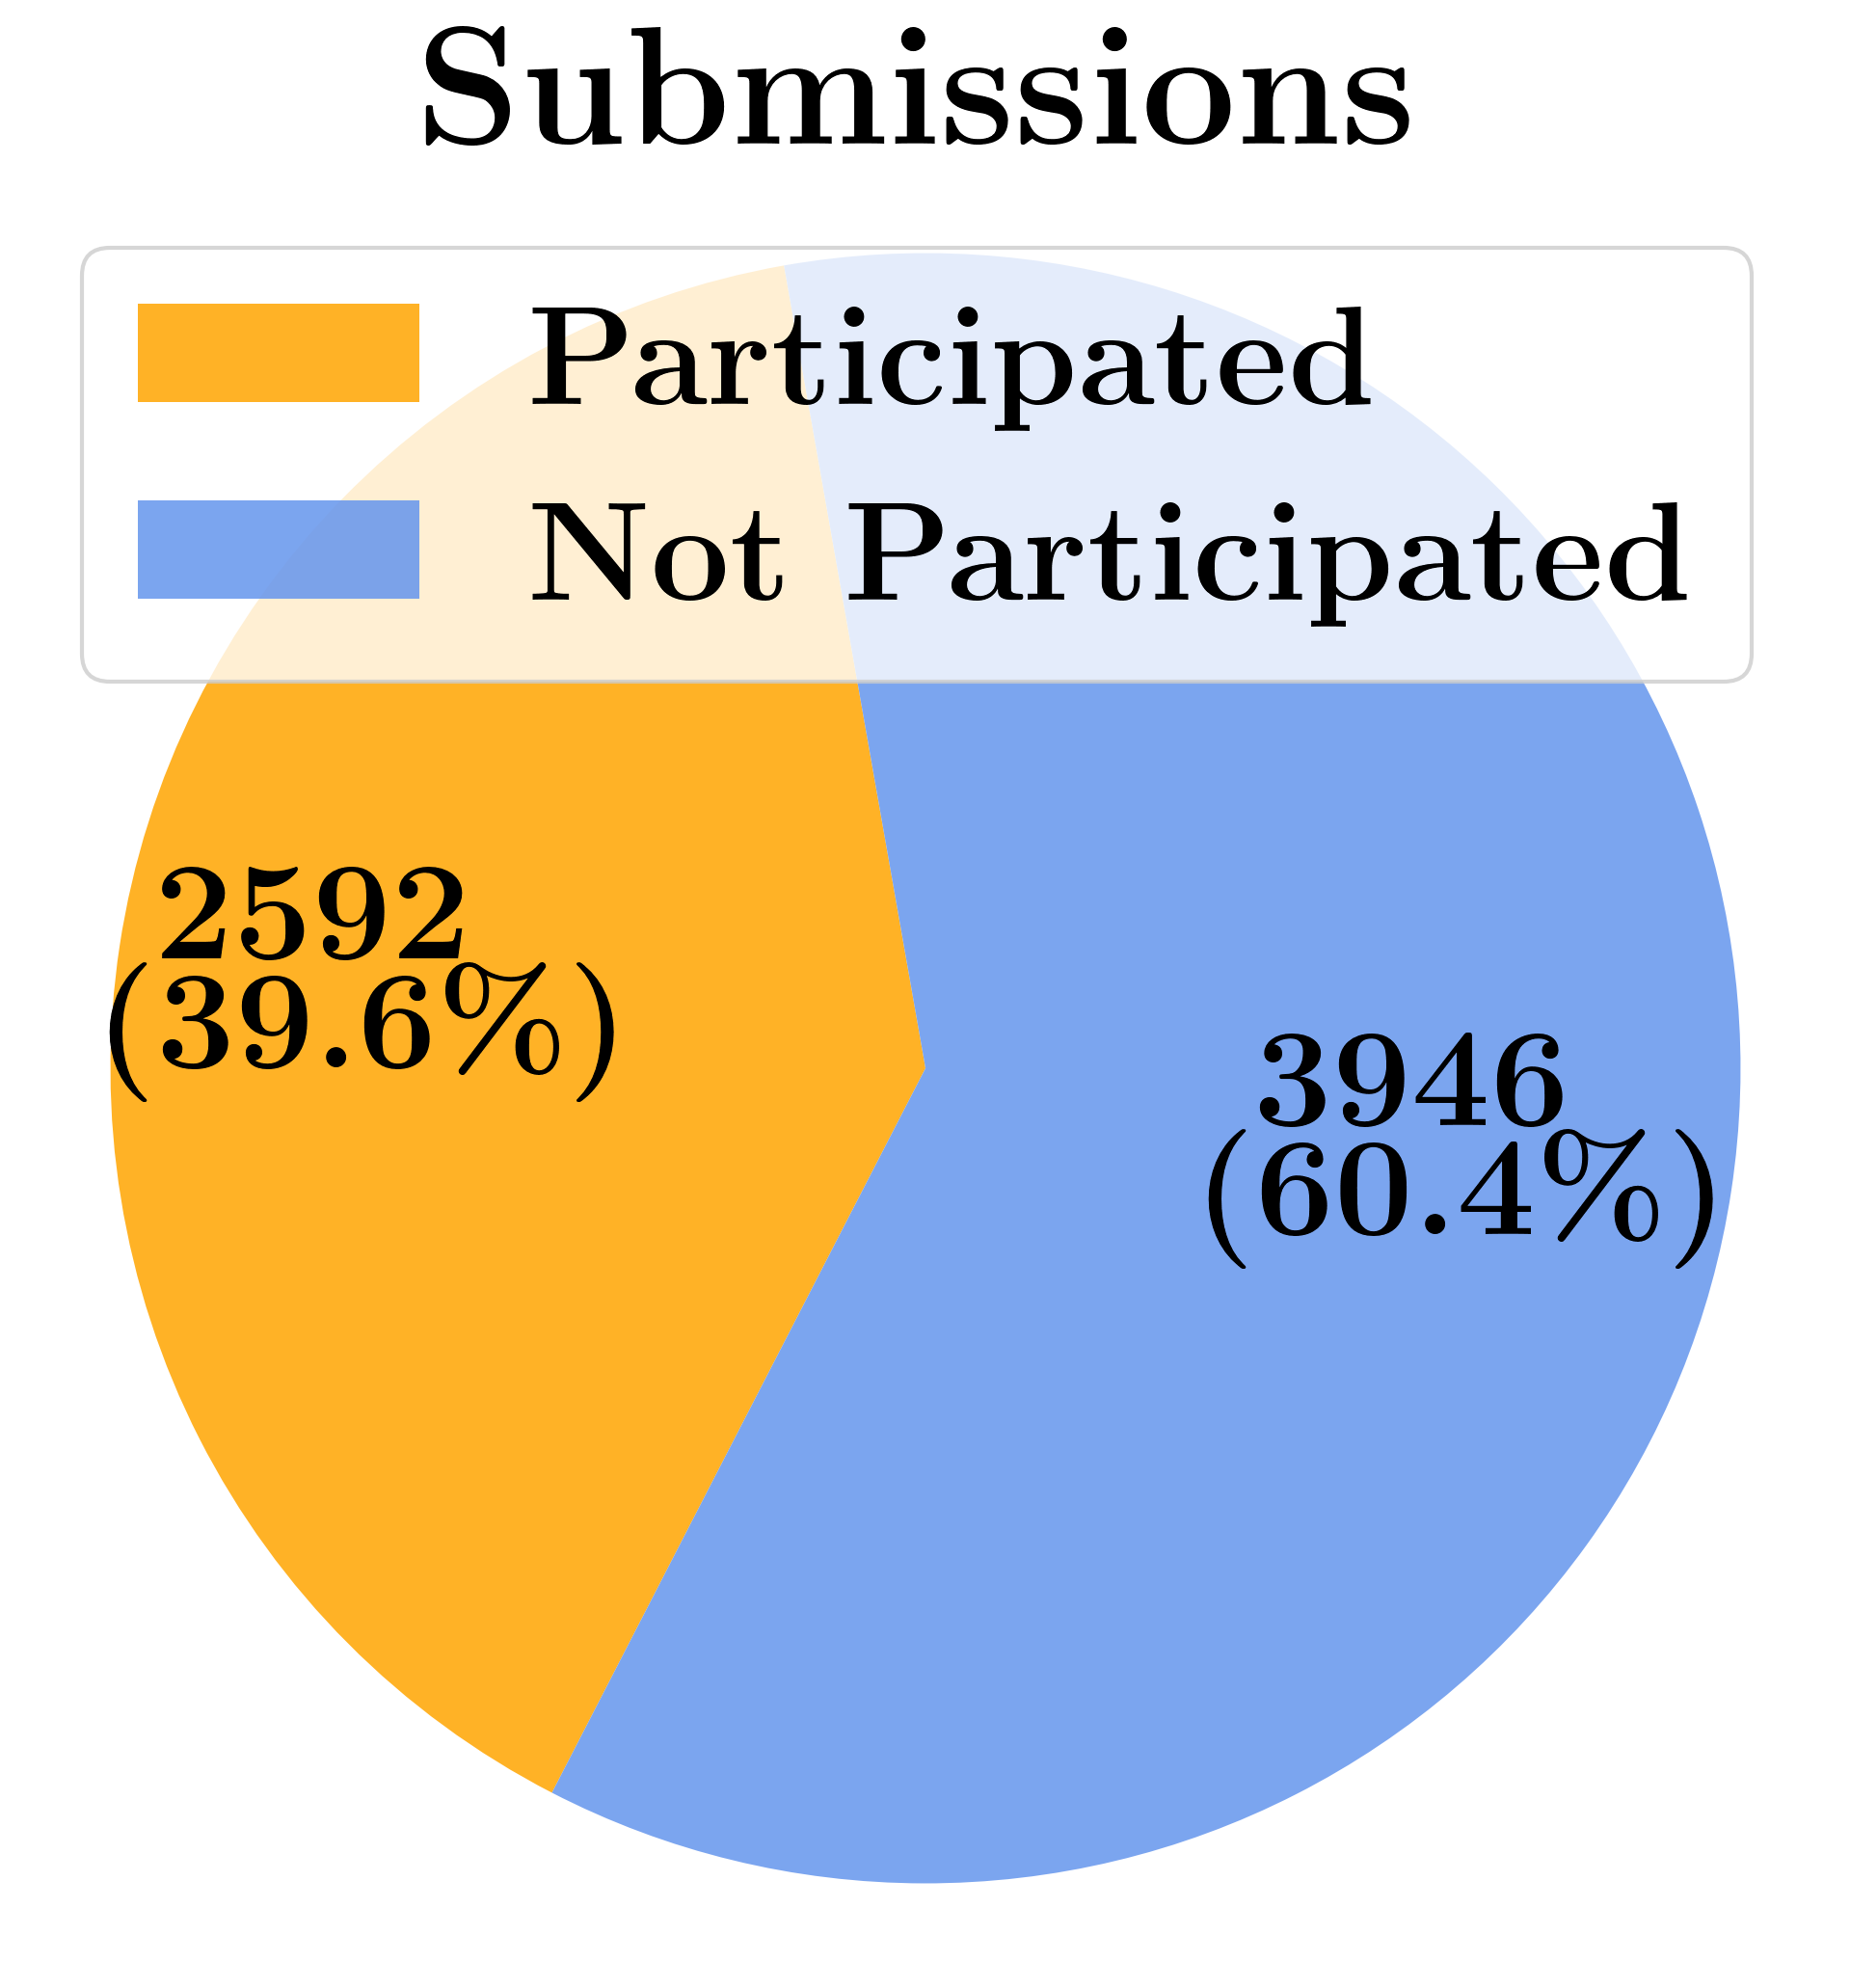

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the pie chart
categories = [r'\textbf{Participated}', r'\textbf{Not Participated}']
values = [2592, 3946]
total = 6538
percentages = [r'\textbf{2592}\\\textbf{(39.6\%)}', r'\textbf{3946}\\\textbf{(60.4\%)}']

# Transparency
tran = 0.85

# Colors
color_options = [
    (255/255, 165/255, 0/255, tran),     # Orange
    (100/255, 149/255, 237/255, tran),   # Cornflower Blue
]
colors = [color_options[0], color_options[1]]

# Create pie chart
plt.figure()
wedges, texts = plt.pie(values, startangle=100, colors=colors, radius=1.1)

# Add custom percentage + count labels (bold with LaTeX)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.75 * np.cos(np.deg2rad(angle))
    y = 0.75 * np.sin(np.deg2rad(angle))
    plt.text(x, y, percentages[i], ha='center', va='center')

# Title and legend in bold
plt.title(r'\textbf{Submissions}')
plt.legend(wedges, categories, loc="upper right", fontsize = 35)
plt.axis('equal')

# Save
plt.savefig("/content/drive/MyDrive/Research/ICML_2023_Result/Figures/" + "pie_chart_participate_submission.png", bbox_inches='tight', dpi=600)
plt.show()
